In [169]:
!pip install yfinance
import yfinance as yf

In [170]:
import warnings
warnings.filterwarnings('ignore')
!pip install --upgrade numpy pmdarima
from pmdarima.arima import auto_arima

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price           Close       High        Low       Open     Volume
Ticker           NVDA       NVDA       NVDA       NVDA       NVDA
Date                                                             
2023-01-03  14.303279  14.983722  14.084458  14.838840  401277000
2023-01-04  14.736924  14.840839  14.229341  14.555074  431324000
2023-01-05  14.253322  14.552077  14.136417  14.479136  389168000
2023-01-06  14.846836  14.997712  14.022512  14.462151  405044000
2023-01-09  15.615204  16.042853  15.128602  15.271486  504231000
Price           Close Daily Return
Ticker           NVDA             
Date                              
2023-01-04  14.736924     0.030318
2023-01-05  14.253322    -0.032816
2023-01-06  14.846836     0.041640
2023-01-09  15.615204     0.051753
2023-01-10  15.895974     0.017981


Text(0.5, 1.0, 'nvda Stock Price and Daily Returns')

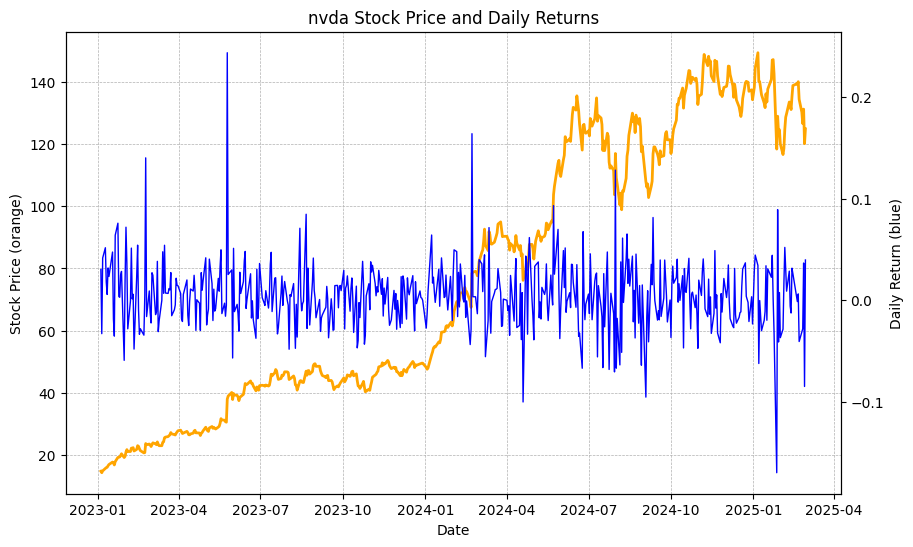

In [172]:
# Define the stock tickerfor Nvidia
stock_ticker = 'nvda'

# Getting historical stock data
nvda_data = yf.download(stock_ticker, start="2023-01-01", end="2025-03-01")
nvda_fore = yf.download(stock_ticker, start="2023-01-01", end="2025-03-01")

print(nvda_data.head())

# Calculate daily returns based on closing prices
nvda_data['Daily Return'] = nvda_data['Close'].pct_change()



# Show the daily returns after removing 1st row
nvda_data = nvda_data.dropna()
print(nvda_data[['Close', 'Daily Return']].head())


# Plot of the daily returns and daily prices

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(nvda_data.index, nvda_data['Close'], color='orange', label='Stock Price', linewidth=2)
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price (orange)')
ax1.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)

ax2 = ax1.twinx()
ax2.plot(nvda_data.index, nvda_data['Daily Return'], color='blue', label='Daily Return', linewidth=1)
ax2.set_ylabel('Daily Return (blue)')

plt.title(f'{stock_ticker} Stock Price and Daily Returns')


In [173]:
# Perform the ADF test to check for the statinarity of daily return time series
adf_result_ret = adfuller(nvda_data['Daily Return'])
print("ADF Statistic:", adf_result_ret)


ADF Statistic: (np.float64(-14.693479219214115), np.float64(3.0237936988771886e-27), 2, 537, {'1%': np.float64(-3.4425861905056556), '5%': np.float64(-2.8669372502674824), '10%': np.float64(-2.5696445454608505)}, np.float64(-2082.144906830307))


In [174]:
adf_result_price = adfuller(nvda_data['Close'])
print("ADF Statistic:", adf_result_price)

ADF Statistic: (np.float64(-0.8550133912802214), np.float64(0.8024261059828492), 16, 523, {'1%': np.float64(-3.4429153652063986), '5%': np.float64(-2.8670821452874007), '10%': np.float64(-2.5697217608736187)}, np.float64(2620.058251102283))


In [175]:
# Building ARIMA model for non stationry NVIDIA daily return
# Efficient ARIMA model Selection
mod_can_auto = auto_arima(
    nvda_data['Close'],  # stepwise=False,
    start_p=0,
    start_d=0,
    start_q=0,
    max_p=3,
    max_d=3,
    max_q=3,
    trace=True,
    with_intercept=False,
    return_valid_fits=True,
)


NameError: name 'auto_arima' is not defined

In [176]:
from statsmodels.tsa.arima.model import ARIMA

# Manual ARIMA grid search for parameter tuning (p, d, q)
best_aic = np.inf
best_order = None
best_model = None

for p in range(3):
    for d in range(2):
        for q in range(3):

                model = ARIMA(nvda_data['Close'], order=(p, d, q))
                result = model.fit()

                best_order = (p, d, q)

                print(result.aic,best_order)



5588.915149717284 (0, 0, 0)
4912.386909670102 (0, 0, 1)
4364.617256882375 (0, 0, 2)
2706.3947532471147 (0, 1, 0)
2704.4620562126215 (0, 1, 1)
2703.0497013963713 (0, 1, 2)
2720.6811758941867 (1, 0, 0)
2718.8396351582883 (1, 0, 1)
2717.317986133099 (1, 0, 2)
2703.8214318640603 (1, 1, 0)
2697.267794756747 (1, 1, 1)
2698.8739779986463 (1, 1, 2)
2718.2034713224475 (2, 0, 0)
2711.611319443296 (2, 0, 1)
2713.186238996819 (2, 0, 2)
2701.874424538839 (2, 1, 0)
2698.8926629060848 (2, 1, 1)
2697.93379821615 (2, 1, 2)


In [177]:
# Best ARIMA Model (1,1,1) for NVIDIA stock price
mod_can_a = SARIMAX(
    nvda_data['Close'], order=(1, 1, 1), trend="c"
).fit()  # This is the best model in Python implementation
print(mod_can_a.summary())

                               SARIMAX Results                                
Dep. Variable:                   NVDA   No. Observations:                  540
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1344.206
Date:                Tue, 25 Mar 2025   AIC                           2696.413
Time:                        13:16:31   BIC                           2713.572
Sample:                             0   HQIC                          2703.124
                                - 540                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3708      0.235      1.575      0.115      -0.091       0.832
ar.L1         -0.8276      0.068    -12.173      0.000      -0.961      -0.694
ma.L1          0.7359      0.080      9.201      0.0

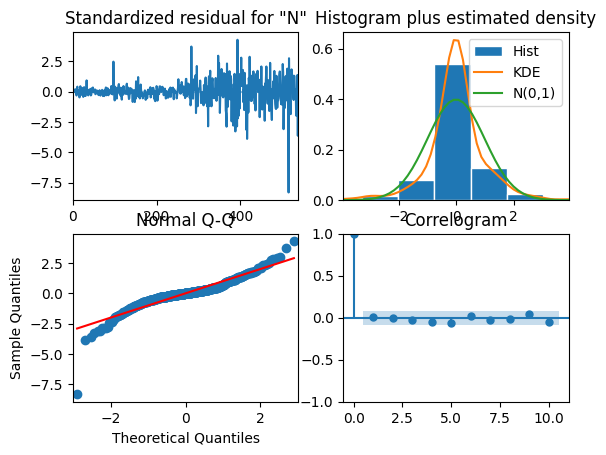

In [178]:
# Diagnostic Report for ARIMA(1,1,1) Model
mod_can_a.plot_diagnostics()
plt.show()

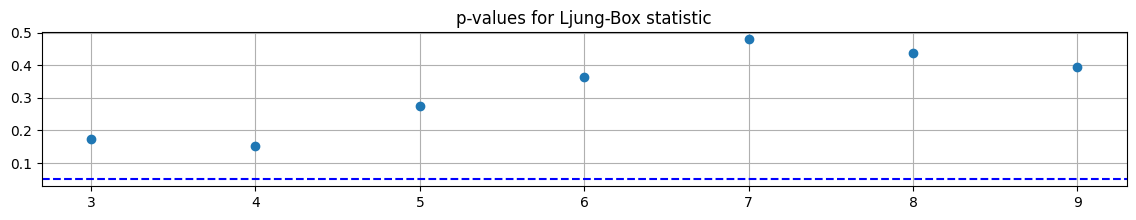

In [179]:
# Ljung-Box test for no serial correlation of standardized residuals
lb_test = mod_can_a.test_serial_correlation(
    method="ljungbox", df_adjust=True, lags=None
)

# plot Ljung-Box test p-values and 0.05 significance line
plt.figure(figsize=(14, 2))
plt.plot(lb_test[0][1], linestyle="", marker="o")
plt.axhline(y=0.05, color="blue", linestyle="--")
plt.title("p-values for Ljung-Box statistic")
plt.grid()
plt.show()

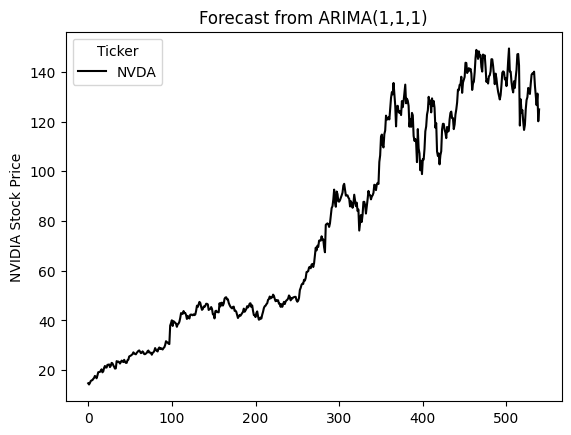

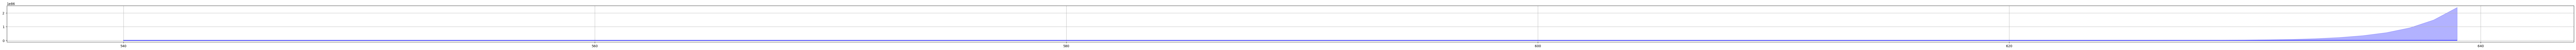

In [180]:
# Forecast Plot of ARIMA(1,1,1) with 95% Confidence Interval

# Plot NVIDIA data
ffx = nvda_data['Close']
ffx.index = [i for i in range(len(ffx))]  # Set numeric index
ffx.plot(ylabel="NVIDIA Stock Price", title="Forecast from ARIMA(1,1,1)", color="k")

plt.figure(figsize=(140, 2))


# get forecast data for next 100 steps
forecast = mod_can_a.get_forecast(steps=100)
forecast_mean = np.exp(forecast.predicted_mean)  # mean of forecast data
conf_int95 = forecast.conf_int(alpha=0.05)  # 95% confidence interval
conf_int80 = forecast.conf_int(alpha=0.2)  # 80% confidence interval

# plot mean forecast and 95% and 80% confidence intervals

plt.plot(forecast_mean, c="b")
plt.fill_between(
    conf_int95.index,
    np.exp(conf_int95["lower NVDA"]),
    np.exp(conf_int95["upper NVDA"]),
    color="b",
    alpha=0.3,
)
plt.fill_between(
    conf_int80.index,
    np.exp(conf_int80["lower NVDA"]),
    np.exp(conf_int80["upper NVDA"]),
    color="b",
    alpha=0.5,
)
plt.grid()
plt.show()



In [181]:
!pip install arch
from arch import arch_model
from scipy import stats
from statsmodels.stats.diagnostic import acorr_ljungbox


In [182]:
# Garch(1,1) model for NVIDIA daily return which is stationary but variance is not constant
# GARCH(1,1) Model with Student's t White Noise
garch11_t_spec = arch_model(
    nvda_data["Daily Return"],
    vol="GARCH",
    p=1,
    q=1,
    mean="AR",
    dist="StudentsT",  # power=2.0,
    rescale=True,
)
garch11_t_fit = garch11_t_spec.fit()
garch11_t_fit.summary()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 2778.899290627921
Iteration:      2,   Func. Count:     17,   Neg. LLF: 936.4062478317553
Iteration:      3,   Func. Count:     25,   Neg. LLF: 13559.376912510841
Iteration:      4,   Func. Count:     32,   Neg. LLF: 835.8023537980173
Iteration:      5,   Func. Count:     40,   Neg. LLF: 125.45697578333395
Iteration:      6,   Func. Count:     47,   Neg. LLF: 140.54237811214585
Iteration:      7,   Func. Count:     54,   Neg. LLF: 122.21362695987233
Iteration:      8,   Func. Count:     61,   Neg. LLF: 151.06905521436917
Iteration:      9,   Func. Count:     68,   Neg. LLF: 123.0901964077908
Iteration:     10,   Func. Count:     75,   Neg. LLF: 125.37249769157305
Iteration:     11,   Func. Count:     82,   Neg. LLF: 125.54303539327596
Iteration:     12,   Func. Count:     89,   Neg. LLF: 125.28823658684644
Iteration:     13,   Func. Count:     96,   Neg. LLF: 118.30073434272875
Iteration:     14,   Func. Count:    103,   Neg. LLF: 1

<class 'statsmodels.iolib.summary.Summary'>
"""
                              AR - GARCH Model Results                              
====================================================================================
Dep. Variable:                 Daily Return   R-squared:                       0.000
Mean Model:                              AR   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -116.358
Distribution:      Standardized Student's t   AIC:                           242.717
Method:                  Maximum Likelihood   BIC:                           264.175
                                              No. Observations:                  540
Date:                      Tue, Mar 25 2025   Df Residuals:                      539
Time:                              13:16:34   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
Const          0.0390  1.216e-02      3.206  1.347e-03 [1.515e-02,6.283e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      7.5366e-03  6.509e-03      1.158      0.247 [-5.220e-03,2.029e-02]
alpha[1]       0.0470  3.446e-02      1.365      0.172   [-2.049e-02,  0.115]
beta[1]        0.8757  8.906e-02      9.833  8.112e-23      [  0.701,  1.050]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             5.1518      1.173      4.391  1.131e-05 [  2.852,  7.452]
========================================================================

Covariance estimator: robust
"""

In [183]:
# Diagnostic tests for GARCH(1,1) Model with Student's t White Noise
print("GARCH(1,1) Model with StudentsT White Noise\n")

# Ljung-Box test and the Box-Pierce test
print("Ljung-Box and Box-Pierce tests on stanrdized residuals")
print(acorr_ljungbox(garch11_t_fit.std_resid, boxpierce=True))

print("\nLjung-Box and Box-Pierce tests on stanrdized squared residuals")
print(acorr_ljungbox(garch11_t_fit.std_resid**2, boxpierce=True))

# ARCH LM test for conditional heteroskedasticity
print("\nARCH LM test for conditional heteroskedasticity for")
print(garch11_t_fit.arch_lm_test(standardized=True))

GARCH(1,1) Model with StudentsT White Noise

Ljung-Box and Box-Pierce tests on stanrdized residuals
     lb_stat  lb_pvalue   bp_stat  bp_pvalue
1   0.380745   0.537205  0.378638   0.538333
2   0.514663   0.773112  0.511567   0.774309
3   2.927404   0.402954  2.902050   0.406975
4   2.929790   0.569643  2.904410   0.573948
5   2.943671   0.708670  2.918112   0.712609
6   3.885783   0.692130  3.846318   0.697465
7   3.941926   0.786442  3.901529   0.791047
8   4.430451   0.816350  4.381040   0.821213
9   5.184740   0.817916  5.120021   0.823723
10  5.961808   0.818462  5.879885   0.825252

Ljung-Box and Box-Pierce tests on stanrdized squared residuals
     lb_stat  lb_pvalue   bp_stat  bp_pvalue
1   0.021175   0.884304  0.021057   0.884623
2   0.032943   0.983663  0.032739   0.983764
3   0.161871   0.983496  0.160478   0.983702
4   0.220684   0.994342  0.218640   0.994443
5   0.273312   0.998115  0.270588   0.998160
6   0.280318   0.999587  0.277491   0.999599
7   0.650026   0.998691  0

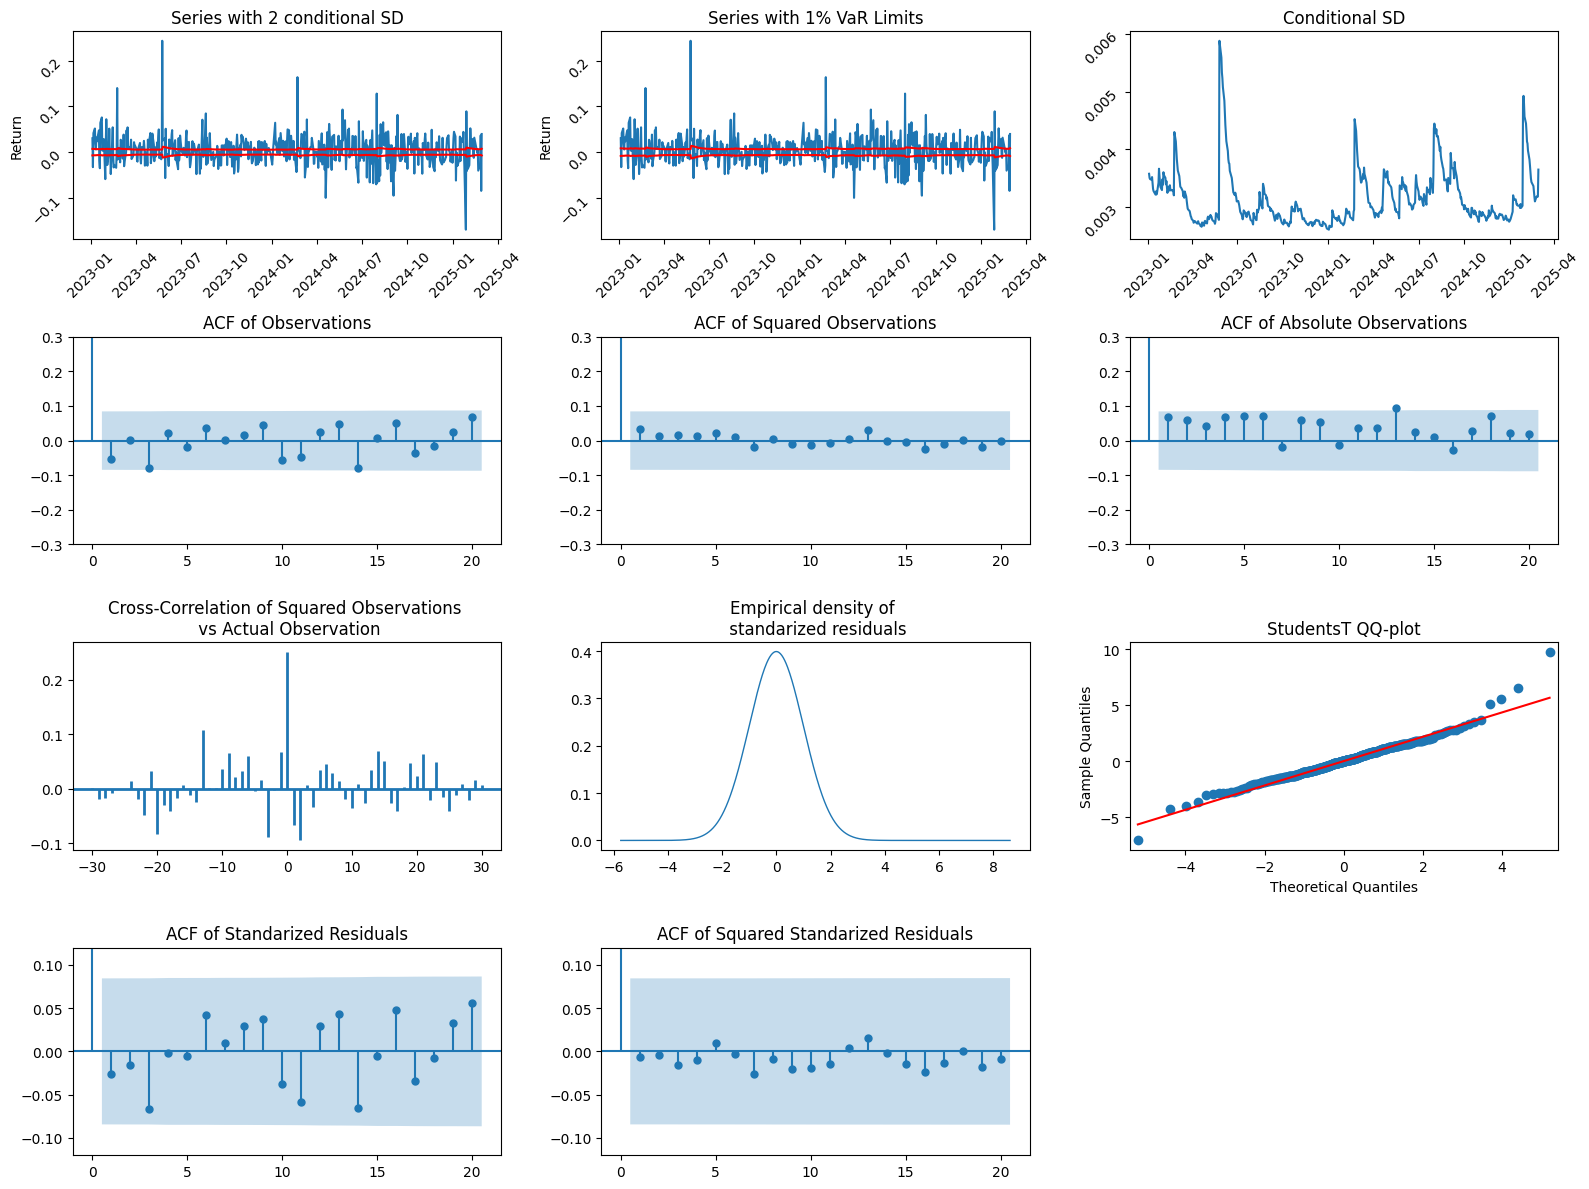

In [184]:
# Model Diagnostic Plots for the GARCH(1,1) Model with Student's t White Noise
fig, ax = plt.subplots(4, 3, figsize=(16, 12))

# Figure Row 1 Column 1
ax[0, 0].plot(nvda_data['Daily Return'])
ax[0, 0].plot(2.0 * garch11_t_fit.conditional_volatility / 100.0, c="r")
ax[0, 0].plot(-2.0 * garch11_t_fit.conditional_volatility / 100.0, c="r")
ax[0, 0].tick_params(labelrotation=45)
ax[0, 0].set_title("Series with 2 conditional SD")
ax[0, 0].set_ylabel("Return")

# Figure Row 1 Column 2
VaR_1 = stats.t(df=len(nvda_data['Daily Return']) - 1).ppf(0.99)
# VaR_1 = stats.norm.ppf(0.99)
ax[0, 1].plot(nvda_data['Daily Return'])
ax[0, 1].plot(VaR_1 * garch11_t_fit.conditional_volatility / 100.0, c="r")
ax[0, 1].plot(-VaR_1 * garch11_t_fit.conditional_volatility / 100.0, c="r")
ax[0, 1].tick_params(labelrotation=45)
ax[0, 1].set_title("Series with 1% VaR Limits")
ax[0, 1].set_ylabel("Return")

# Figure Row 1 Column 3
ax[0, 2].plot(garch11_t_fit.conditional_volatility / 100.0)
ax[0, 2].set_title("Conditional SD")
ax[0, 2].tick_params(labelrotation=45)

# Figure Row 2 Column 1
sm.graphics.tsa.plot_acf(garch11_t_fit.resid / 100.0, lags=20, ax=ax[1, 0])
ax[1, 0].set_title("ACF of Observations")
ax[1, 0].set_ylim([-0.3, 0.3])

# Figure Row 2 Column 2
sm.graphics.tsa.plot_acf(garch11_t_fit.resid**2, lags=20, ax=ax[1, 1])
ax[1, 1].set_title("ACF of Squared Observations")
ax[1, 1].set_ylim([-0.3, 0.3])

# Figure Row 2 Column 3
sm.graphics.tsa.plot_acf(np.abs(garch11_t_fit.resid), lags=20, ax=ax[1, 2])
ax[1, 2].set_title("ACF of Absolute Observations")
ax[1, 2].set_ylim([-0.3, 0.3])

# Figure Row 3 Column 1
ax[2, 0].xcorr(
    garch11_t_fit.resid**2,
    garch11_t_fit.resid,
    usevlines=True,
    maxlags=30,
    normed=True,
    lw=2,
)
ax[2, 0].set_title("Cross-Correlation of Squared Observations \n vs Actual Observation")

# Figure Row 3 Column 2
standaraized_residuals = garch11_t_fit.std_resid
min_val = np.min(standaraized_residuals)
max_val = np.max(standaraized_residuals)
empirical_density = np.linspace(min_val, max_val, len(standaraized_residuals))
ax[2, 1].plot(empirical_density, stats.norm.pdf(empirical_density), lw=1)
ax[2, 1].set_title("Empirical density of \n standarized residuals")

# Figure Row 3 Column 3
sm.qqplot(garch11_t_fit.resid, stats.t, fit=True, line="q", ax=ax[2, 2])
ax[2, 2].set_title("StudentsT QQ-plot")

# Figure Row 4 Column 1
sm.graphics.tsa.plot_acf(garch11_t_fit.std_resid, lags=20, ax=ax[3, 0])
ax[3, 0].set_title("ACF of Standarized Residuals")
ax[3, 0].set_ylim([-0.12, 0.12])

# Figure Row 4 Column 2
sm.graphics.tsa.plot_acf((garch11_t_fit.std_resid) ** 2, lags=20, ax=ax[3, 1])
ax[3, 1].set_title("ACF of Squared Standarized Residuals")
ax[3, 1].set_ylim([-0.12, 0.12])

ax[3, 2].axis("off")
fig.tight_layout()
plt.show()